In [9]:
# Common imports
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [10]:
df_house = pd.read_csv('housing.csv')
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Column 'total_bedrooms' have 207 missing values; ocean_proximity is not numerical data.

In [12]:
# take a look how many districts belong to each category
df_house["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


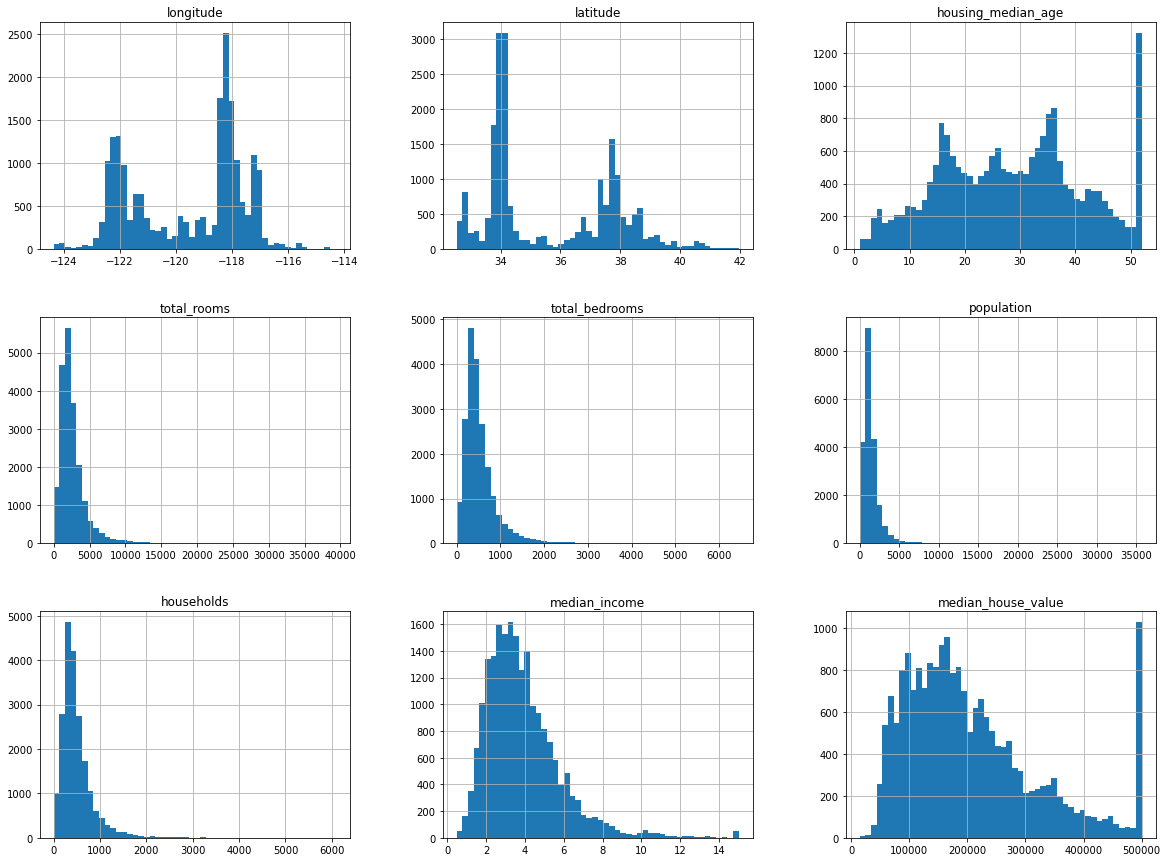

In [14]:
# plot a histogram for each numerical attribute to get a feel of data
%matplotlib inline
import matplotlib.pyplot as plt
df_house.hist(bins=50, figsize=(20,15))
plt.show()

Observation:

These attributes have very different scales.
The housing_median_age and the median_house_value were capped. The median_house_value may be a serious problem since it is the label to predict. The Machine Learning algorithms may learn that prices never go beyond that limit. You need to check to see if this is a problem or not. If precise predictions even beyond 500,000 is needed, then you have two options:

Option 1: Collect proper labels for the districts whose labels were capped.
Option 2: Remove those districts from the dataset.
Many attributes are right skewed. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes to have more bell-shaped distributions.

Split the data

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is train_test_split(), which provides a couple of additional features.

First, there is a random_state parameter that allows you to set the random generator seed.
Second, you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels.

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_house, test_size=0.2, random_state=42)

In [16]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [17]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


So far we have considered purely random sampling methods. This is generally fine if the dataset is large enough (especially relative to the number of attributes), but if it is not, will face the risk of introducing a significant sampling bias.

Suppose median_income is a very important attribute to predict median housing prices. We want to ensure that the test set is representative of the various categories of incomes in the whole dataset.

Since the median_income is a continuous numerical attribute, we first need to create an income category attribute.

<AxesSubplot:>

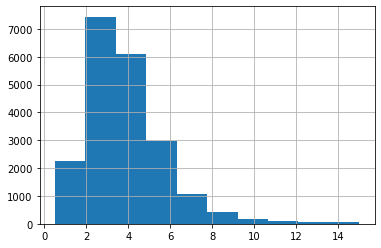

In [18]:
df_house["median_income"].hist()

In [19]:
pd.cut(df_house["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf])

0        (6.0, inf]
1        (6.0, inf]
2        (6.0, inf]
3        (4.5, 6.0]
4        (3.0, 4.5]
            ...    
20635    (1.5, 3.0]
20636    (1.5, 3.0]
20637    (1.5, 3.0]
20638    (1.5, 3.0]
20639    (1.5, 3.0]
Name: median_income, Length: 20640, dtype: category
Categories (5, interval[float64]): [(0.0, 1.5] < (1.5, 3.0] < (3.0, 4.5] < (4.5, 6.0] < (6.0, inf]]

In [20]:
df_house["income_cat"] = pd.cut(df_house["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [21]:
df_house["income_cat"].value_counts().sort_index()

1     822
2    6581
3    7236
4    3639
5    2362
Name: income_cat, dtype: int64

<AxesSubplot:>

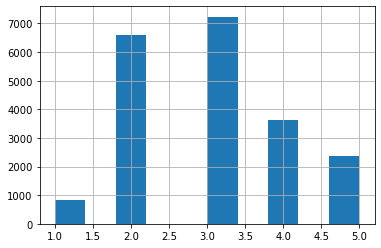

In [22]:
df_house["income_cat"].hist()

The stratify within train_test_split offers an option for stratified sampling.

In [23]:
strat_train_set, strat_test_set = train_test_split(df_house, test_size=0.2, random_state=42, 
                                         stratify = df_house["income_cat"])

We can also use Scikit-Learn’s StratifiedShuffleSplit to realize stratified sampling.

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_house, df_house["income_cat"]):
    strat_train_set1 = df_house.loc[train_index]
    strat_test_set1 = df_house.loc[test_index]

we can take a look at the comparison of stratified sampling and random sampling.

In [25]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

In [26]:
train_set, test_set = train_test_split(df_house, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df_house),
    "Stratified": income_cat_proportions(strat_test_set), # train_test_split
    "Stratified1": income_cat_proportions(strat_test_set1), #StratifiedShuffleSplit
    "Random": income_cat_proportions(test_set),
}).sort_index()

In [27]:
compare_props.head()

,Overall,Stratified,Stratified1,Random
1,0.039826,0.039729,0.039729,0.040213
2,0.318847,0.318798,0.318798,0.324370
3,0.350581,0.350533,0.350533,0.358527
4,0.176308,0.176357,0.176357,0.167393
5,0.114438,0.114583,0.114583,0.109496


In [28]:
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Stratified1,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.114583,0.109496,-4.318374,0.127011


In [29]:
df_house["income_cat"].value_counts() / len(df_house)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [30]:
# remove the income_cat attribute so the data is back to its original
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

C:\Users\janar\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Gain insights

In [31]:
train = strat_train_set.copy()

In [32]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


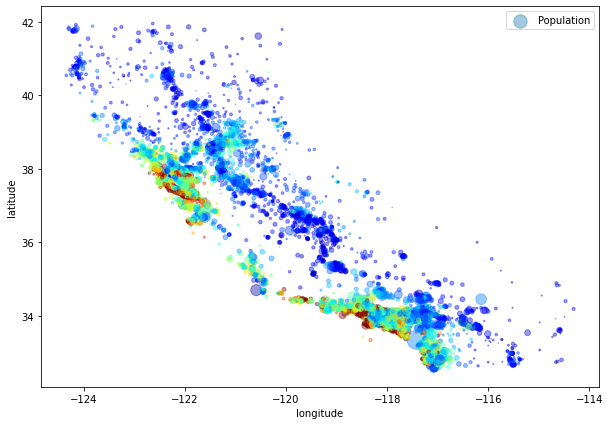

In [33]:
ax = train.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=train['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )